   iso_code continent        location last_updated_date  total_cases  \
0       AFG      Asia     Afghanistan        2024-08-04     235214.0   
1  OWID_AFR       NaN          Africa        2024-08-04   13145380.0   
2       ALB    Europe         Albania        2024-08-04     335047.0   
3       DZA    Africa         Algeria        2024-08-04     272139.0   
4       ASM   Oceania  American Samoa        2024-08-04       8359.0   

   new_cases  new_cases_smoothed  Total_Deaths  new_deaths  \
0        0.0               0.000        7998.0         0.0   
1       36.0               5.143      259117.0         0.0   
2        0.0               0.000        3605.0         0.0   
3       18.0               2.571        6881.0         0.0   
4        0.0               0.000          34.0         0.0   

   new_deaths_smoothed  ...  handwashing_facilities  \
0                  0.0  ...               37.746000   
1                  0.0  ...               50.788844   
2                  0.0  ...  

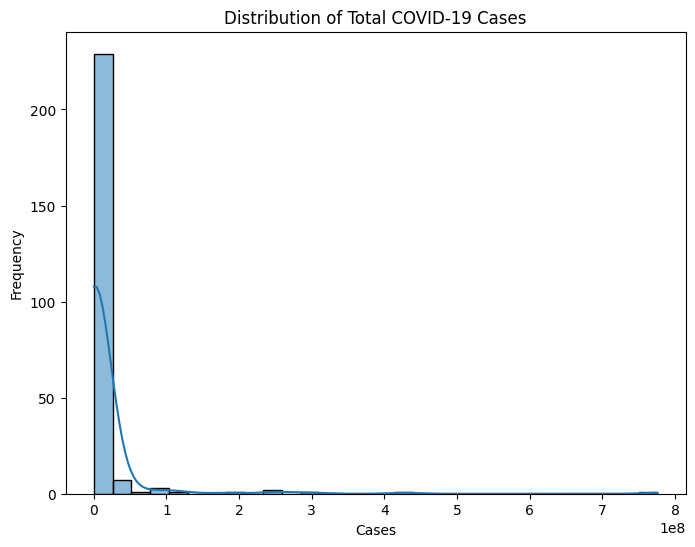

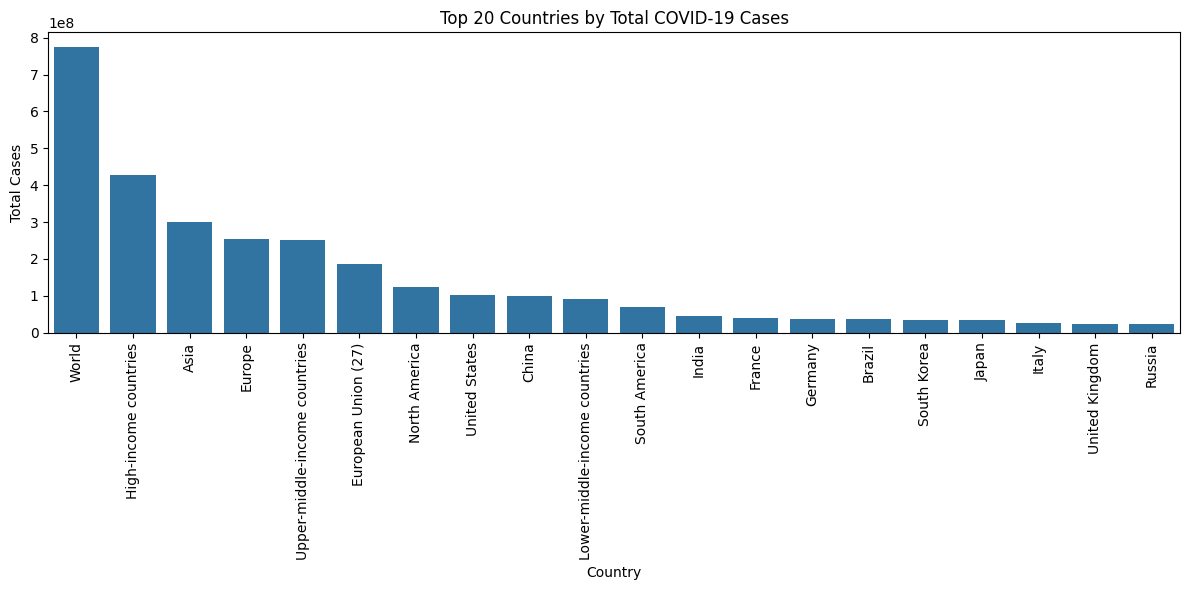

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Covid-19_Dataset.csv')

# Basic cleaning
df.drop_duplicates(inplace=True)

# Fill missing numeric values with column mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Rename total_deaths for clarity
df.rename(columns={'total_deaths': 'Total_Deaths'}, inplace=True)

# Create a new column for deaths per case (handle division by zero)
df['Deaths per Case'] = np.where(df['total_cases'] > 0,
                                 df['Total_Deaths'] / df['total_cases'],
                                 0)

# Calculate average total cases per continent
avg_cases_per_continent = df.groupby('continent')['total_cases'].mean()

# Calculate global total cases (as a single variable, not column)
global_total_cases = df['total_cases'].sum()

# Calculate standard deviation of total cases by continent
std_cases_by_continent = df.groupby('continent')['total_cases'].std()

# Find the maximum total cases by country
max_cases_by_country = df.groupby('location')['total_cases'].max()

# Display dataset info
print(df.head())
print(df.info())
print(df.describe())

# Visualize the distribution of total cases
plt.figure(figsize=(8, 6))
sns.histplot(df['total_cases'], bins=30, kde=True)
plt.title('Distribution of Total COVID-19 Cases')
plt.xlabel('Cases')
plt.ylabel('Frequency')
plt.show()

# Visualize top 20 countries by total cases (barplot instead of lineplot)
plt.figure(figsize=(12, 6))
top_countries = df.groupby('location')['total_cases'].max().nlargest(20).reset_index()
sns.barplot(x='location', y='total_cases', data=top_countries)
plt.title('Top 20 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Save cleaned dataset
df.to_csv('cleaned_covid_data.csv', index=False)